In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools
from scipy.spatial import distance

%matplotlib inline

# 6.2.1

In [41]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    return np.exp(-distance.cdist(X1, X2, 'sqeuclidean')/(2*sigma**2))
    #TODO

def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    return (offset + np.dot(X1, np.transpose(X2)))**degree  #.T只能转array
    #TODO


In [ ]:
### Kernel function generators
def linear_kernel(X1, X2):

    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):

    return np.exp(-distance.cdist(X1, X2, 'sqeuclidean')/(2*sigma**2))


def polynomial_kernel(X1, X2, offset, degree):

    return (offset + np.dot(X1, np.transpose(X2)))**degree 


# 6.2.2

In [23]:
X1=np.array([-4,-1,0,2]).reshape(-1,1)
output = linear_kernel(X1, X1)
output

array([[16,  4,  0, -8],
       [ 4,  1,  0, -2],
       [ 0,  0,  0,  0],
       [-8, -2,  0,  4]])

# 6.2.3

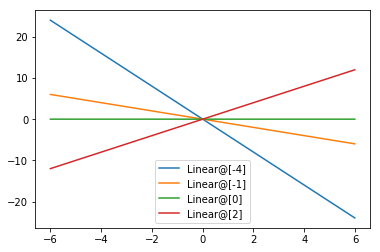

In [24]:
# PLot kernel machine functions
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 
 

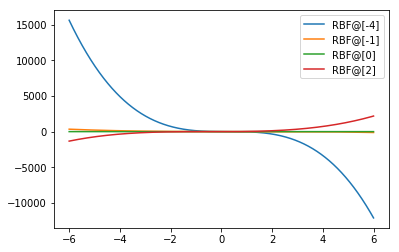

In [35]:

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)


y = polynomial_kernel(prototypes, xpts, 1, 3) 
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 

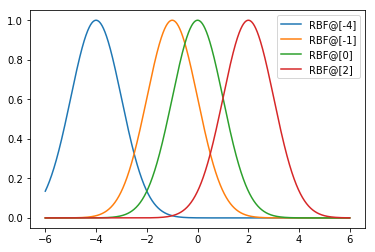

In [32]:
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

y = RBF_kernel(prototypes, xpts,1) 
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

In [43]:
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            prototype_points - an Rxd matrix with rows mu_1,...,mu_R
            weights - a vector of length R with entries w_1,...,w_R
        """

        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R w_i k(x_j, mu_i)
        """
        return np.dot(self.weights.T, self.kernel(self.prototype_points,X)).reshape(-1,1)

        # TODO

In [ ]:
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):
       
        return np.dot(self.weights.T, self.kernel(self.prototype_points,X)).reshape(-1,1)

        # TODO

In [44]:
prototype_p = np.array([-1, 0, 1]).reshape(-1,1)
weight = np.array([1, -1, 1]).reshape(-1,1)
k = functools.partial(RBF_kernel,sigma=1)
RBF_K = Kernel_Machine(k,prototype_p,weight)

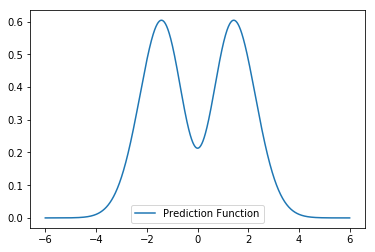

In [45]:
preds = RBF_K.predict(xpts)

plt.plot(xpts, preds, label="Prediction Function")
plt.legend(loc = 'best')
plt.show()

# 6.3.1

Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

In [46]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

No handles with labels found to put in legend.


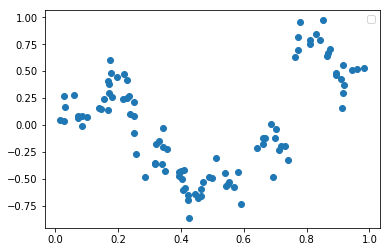

In [53]:
plt.plot(x_train, y_train, 'o')
plt.legend(loc = 'best')
plt.show()

In [58]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    K = kernel(X, X)
    I = np.identity(X.shape[0])
    alpha = np.dot(np.linalg.inv(l2reg*I + K),y)
    # TODO
    return Kernel_Machine(kernel, X, alpha)  

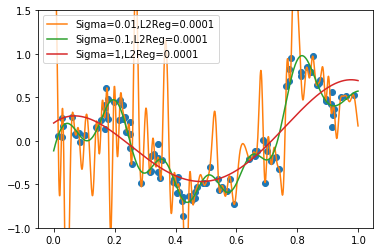

In [59]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

Sigma=0.01 is the most over fitting. Sigma=1 is less over fitting.

# 6.3.4

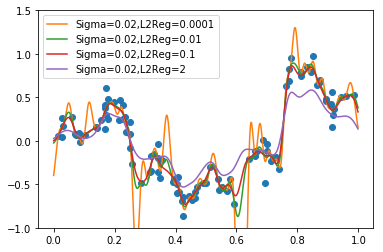

In [61]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

When \lambda \to \infty, the alpha is compressed to zero, which means the predicted function becomes flatter, y \to 0.

In [62]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return((self.predict(X)-y).mean()) 

In [63]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [144]:
param_grid = [{'kernel': ['RBF'],'sigma':[.05,1,2], 'l2reg': np.arange(-0.4,0.4,0.01)},
              {'kernel':['polynomial'],'offset':np.arange(-5,20,1), 'degree':np.arange(-5,20,1),'l2reg': np.arange(-1,1,0.01)},#'l2reg':[10, .1, .01] 
              {'kernel':['linear'],'l2reg': np.arange(-1,10,0.1)}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['RBF'], 'sigma': [0.05, 1, 2], 'l2reg': array([-0.4 , -0.39, ...,  0.38,  0.39])}, {'kernel': ['polynomial'], 'offset': [-2, 0, 5], 'degree': [1, 3, 5], 'l2reg': array([ 32.    ,  16.    ,   8.    ,   4.    ,   2.    ,   1.    ,
         0.5   ,   0.25  ,   0.125 ,   0.0625])}, {'kernel': ['linear'], 'l2reg': [10, 1, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [145]:
pd.set_option('display.max_rows', 100)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

/Users/zhangben/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/zhangben/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/zhangben/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
234,-,RBF,3.800000e-01,-,0.05,0.013873,0.014181
231,-,RBF,3.700000e-01,-,0.05,0.013873,0.014119
237,-,RBF,3.900000e-01,-,0.05,0.013873,0.014243
228,-,RBF,3.600000e-01,-,0.05,0.013876,0.014056
225,-,RBF,3.500000e-01,-,0.05,0.013880,0.013994
222,-,RBF,3.400000e-01,-,0.05,0.013886,0.013931
219,-,RBF,3.300000e-01,-,0.05,0.013895,0.013868
216,-,RBF,3.200000e-01,-,0.05,0.013905,0.013805
213,-,RBF,3.100000e-01,-,0.05,0.013918,0.013741
210,-,RBF,3.000000e-01,-,0.05,0.013934,0.013678


In [212]:
df = pd.DataFrame()
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"

df['param_kernel'] = ['Best RBF','Nearby RBF','Best Polynomial','Nearby Polynomial','Best Linear','Nearby Linear']
df['param_degree'] = ["-","-",-1,-1,"-","-"]
df['param_offset'] = ["-","-",9,17,"-","-"]
df['param_sigma'] = [0.05,0.05,"-","-","-","-"]
df['param_l2reg'] = [3.900000e-01,3.600000e-01, 8.881784e-15,8.881784e-15,4.1, 4.0]
df['mean_test_score'] = [0.013873,0.013876,2.920577e-02, 2.926475e-02,0.164509,0.164515]
df['mean_train_score'] = [0.014243,0.014056,0.045620,0.041863,0.206561,0.206529]

df


,param_kernel,param_degree,param_offset,param_sigma,param_l2reg,mean_test_score,mean_train_score
0,Best RBF,-,-,0.05,3.900000e-01,0.013873,0.014243
1,Nearby RBF,-,-,0.05,3.600000e-01,0.013876,0.014056
2,Best Polynomial,-1,9,-,8.881784e-15,0.029206,0.045620
3,Nearby Polynomial,-1,17,-,8.881784e-15,0.029265,0.041863
4,Best Linear,-,-,-,4.100000e+00,0.164509,0.206561
5,Nearby Linear,-,-,-,4.000000e+00,0.164515,0.206529


In [197]:
# Can be a more convenient way to look at the table
import qgrid 
#qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
qgrid.show_grid(df_toshow)

ModuleNotFoundError: No module named 'qgrid'

# 6.3.6

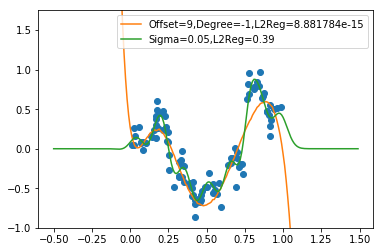

In [218]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= 9
degree = -1
l2reg = 8.881784e-15
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 0.05
l2reg= 3.900000e-01
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

The RBF kernel predicted function performs better than the polynomial one. Both functions work well int the area x \in [0,1]. Outside of this area, RBF kernel predicted function  \to \infty, while the polynomial one \to +\infty or -\infty

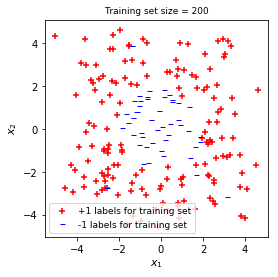

In [219]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

In [221]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

NameError: name 'train_soft_svm' is not defined